In [28]:
import pandas as pd
import networkx  as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go


Interactive HTML saved successfully!


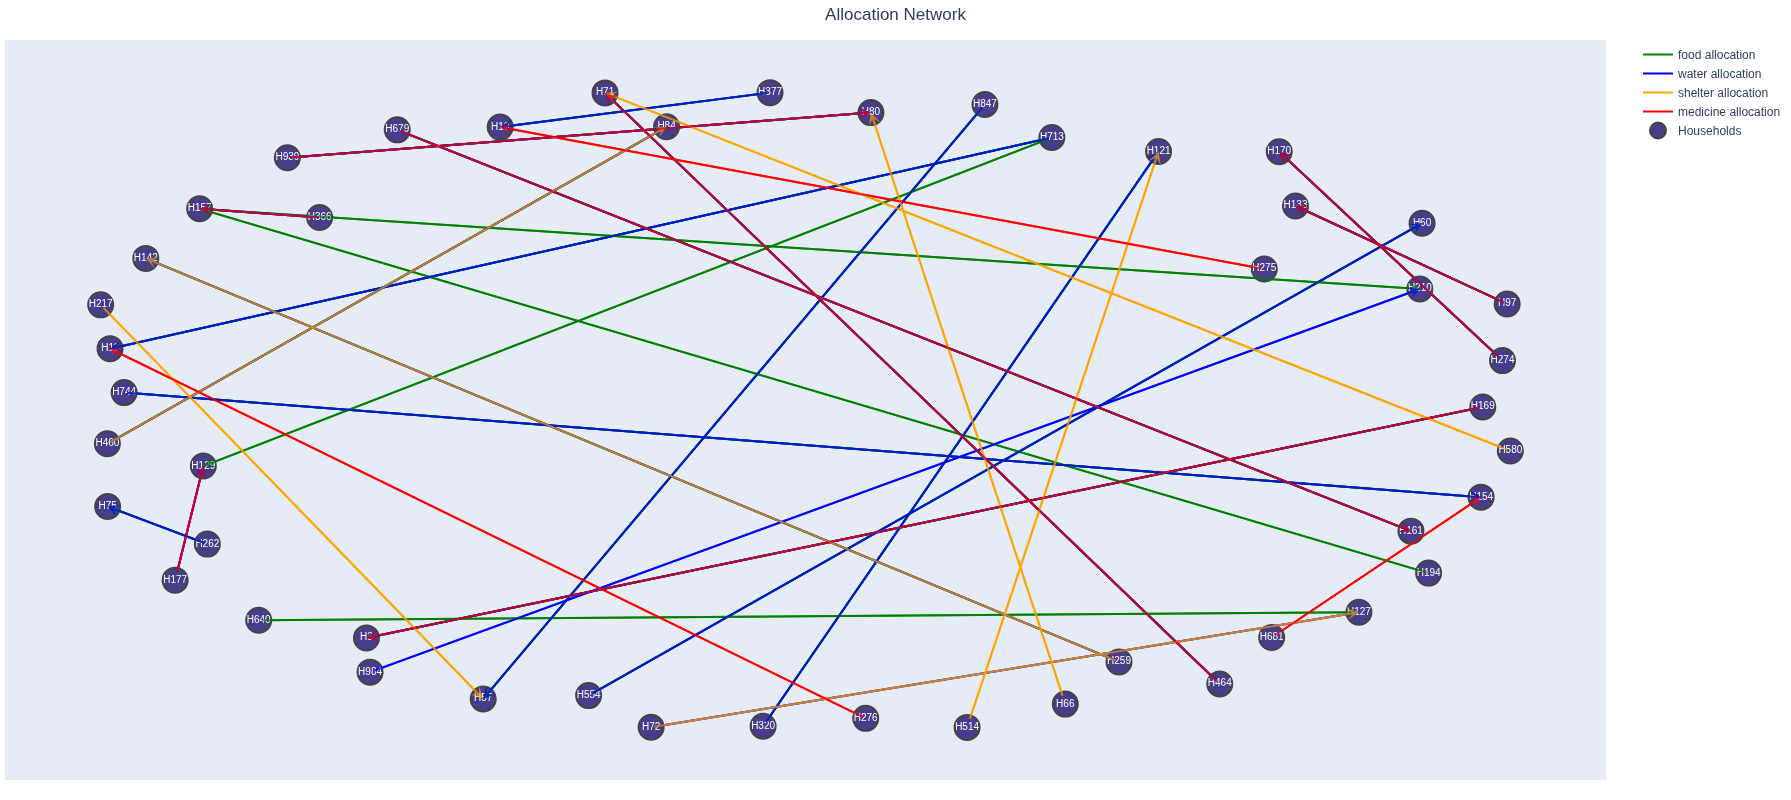

In [29]:
def plot_allocation_network(alloc_df):
    resources = ['food', 'water', 'shelter', 'medicine']
    resource_colors = {'food': 'green', 'water': 'blue', 'shelter': 'orange', 'medicine': 'red'}

    G = nx.DiGraph()
    all_nodes = set(alloc_df['to'])
    for r in resources:
        all_nodes.update(alloc_df[f'{r}_from'].dropna().unique())
    for node in all_nodes:
        G.add_node(node)

    edge_dict = {r: [] for r in resources}
    for r in resources:
        from_col = f'{r}_from'
        temp = alloc_df.dropna(subset=[from_col])
        for _, row in temp.iterrows():
            u, v = row[from_col], row['to']
            edge_dict[r].append((u, v))

    pos = nx.spring_layout(G, k=0.5, iterations=50, seed=42)

    node_trace = go.Scatter(
        x=[pos[n][0] for n in G.nodes()],
        y=[pos[n][1] for n in G.nodes()],
        text=list(G.nodes()),
        mode='markers+text',
        textposition='middle center',
        textfont=dict(color='white', size=10),
        marker=dict(color='darkslateblue', size=25, line_width=2),
        hoverinfo='text',
        name='Households'
    )

    edge_traces = []
    for r in resources:
        x_edges, y_edges = [], []
        for u, v in edge_dict[r]:
            x_edges += [pos[u][0], pos[v][0], None]
            y_edges += [pos[u][1], pos[v][1], None]
        edge_trace = go.Scatter(
            x=x_edges, y=y_edges,
            line=dict(width=2, color=resource_colors[r]),
            hoverinfo='none',
            mode='lines',
            name=f'{r} allocation'
        )
        edge_traces.append(edge_trace)

    fig = go.Figure(data=edge_traces + [node_trace])

    for r in resources:
        for u, v in edge_dict[r]:
            fig.add_annotation(
                x=pos[v][0], y=pos[v][1],
                ax=pos[u][0], ay=pos[u][1],
                xref='x', yref='y', axref='x', ayref='y',
                showarrow=True,
                arrowhead=3,
                arrowsize=1,
                arrowwidth=2,
                arrowcolor=resource_colors[r],
                opacity=0.7
            )

    fig.update_layout(
        title='Allocation Network',
        title_x=0.5,
        showlegend=True,
        hovermode='closest',
        margin=dict(b=20, l=5, r=5, t=40),
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        width=1200,
        height=800
    )

    return fig

if __name__ == "__main__":
    alloc_df = pd.read_csv('../outputs/allocations/allocations_demo.csv')
    fig = plot_allocation_network(alloc_df)

    fig.write_html("../outputs/visualizations/allocation_graph.html")
    print("Interactive HTML saved successfully!")

    fig.show()
